In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import cv2
import pandas as pd
from tqdm import tqdm  # Importing tqdm for progress bar

# Directory where the images are stored
base_dir = '/kaggle/input/plantdisease/PlantVillage/'

# Lists to store image data and labels (folder names)
image_data = []
labels = []

# Walk through the directory to get image paths
folders = os.listdir(base_dir)  # Get all folder names

# Add a progress bar with tqdm
for folder in tqdm(folders, desc="Processing Folders"):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            # Get the full image path
            image_path = os.path.join(folder_path, image_file)
            
            # Read the image using cv2
            img = cv2.imread(image_path)
            
            # If the image is read successfully, add to list
            if img is not None:
                image_data.append(img)
                labels.append(folder)  # Folder name is the label

# Create a Pandas DataFrame
df = pd.DataFrame({
    'image': image_data,
    'label': labels
})

# Display the first few rows
# print(df.head())

Processing Folders: 100%|██████████| 15/15 [02:59<00:00, 11.98s/it]


In [4]:
df.shape

(20638, 2)

In [5]:
print(df.iloc[0])  # Using iloc to get the first row

image    [[[165, 158, 165], [164, 157, 164], [159, 152,...
label                        Pepper__bell___Bacterial_spot
Name: 0, dtype: object


In [6]:
df.head()

,image,label
0,"[[[165, 158, 165], [164, 157, 164], [159, 152,...",Pepper__bell___Bacterial_spot
1,"[[[161, 157, 162], [162, 158, 163], [163, 159,...",Pepper__bell___Bacterial_spot
2,"[[[174, 150, 162], [165, 145, 157], [150, 133,...",Pepper__bell___Bacterial_spot
3,"[[[113, 112, 128], [122, 121, 137], [108, 106,...",Pepper__bell___Bacterial_spot
4,"[[[112, 88, 98], [73, 49, 59], [87, 63, 73], [...",Pepper__bell___Bacterial_spot


In [7]:
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
def show_images_from_dataframe(df, num_images=5):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        img = df['image'].iloc[i]  # Access the image data
        label = df['label'].iloc[i]  # Access the label data

        # Display the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)  # Display image (assuming img is already in correct RGB format)
        plt.title(label)
        plt.axis('off')

    plt.show()

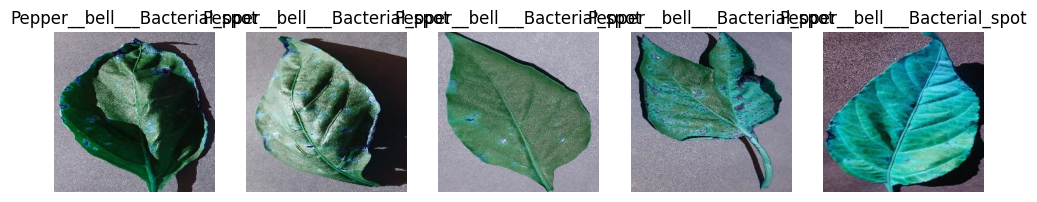

In [8]:
# Display the first 5 images
show_images_from_dataframe(df, num_images=5)

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Display the shapes of the resulting splits
print(f"Training set size: {train_df.shape}")
print(f"Testing set size: {test_df.shape}")

Training set size: (16510, 2)
Testing set size: (4128, 2)


In [10]:
train_df.shape

(16510, 2)

In [11]:
train_df.head()

,image,label
15038,"[[[182, 168, 172], [182, 168, 172], [181, 167,...",Pepper__bell___healthy
7088,"[[[155, 155, 161], [149, 149, 155], [148, 148,...",Tomato_Bacterial_spot
17526,"[[[187, 186, 195], [188, 187, 196], [196, 195,...",Tomato_Late_blight
355,"[[[74, 87, 109], [127, 140, 162], [108, 121, 1...",Pepper__bell___Bacterial_spot
15382,"[[[115, 115, 129], [117, 117, 131], [123, 123,...",Pepper__bell___healthy


In [12]:
# Group by 'label' column and count the number of occurrences of each label
class_counts = df.groupby('label').size().reset_index(name='counts')

# Display the result
print(class_counts)

                                          label  counts
0                 Pepper__bell___Bacterial_spot     997
1                        Pepper__bell___healthy    1478
2                         Potato___Early_blight    1000
3                          Potato___Late_blight    1000
4                              Potato___healthy     152
5                         Tomato_Bacterial_spot    2127
6                           Tomato_Early_blight    1000
7                            Tomato_Late_blight    1909
8                              Tomato_Leaf_Mold     952
9                     Tomato_Septoria_leaf_spot    1771
10  Tomato_Spider_mites_Two_spotted_spider_mite    1676
11                          Tomato__Target_Spot    1404
12        Tomato__Tomato_YellowLeaf__Curl_Virus    3208
13                  Tomato__Tomato_mosaic_virus     373
14                               Tomato_healthy    1591


In [13]:
# df.info()

In [14]:
import os
os.listdir("/kaggle/input/plantdisease/PlantVillage")

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Bacterial_spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Early_blight',
 'Tomato__Target_Spot',
 'Pepper__bell___healthy',
 'Potato___Late_blight',
 'Tomato_Late_blight',
 'Potato___Early_blight',
 'Tomato__Tomato_mosaic_virus']

In [15]:
input_path = '/kaggle/input/plantdisease/PlantVillage'

In [16]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Define the path to your dataset
# input_path = 'PlantVillage/'  # Update this path if necessary

# Define your transformations (assuming you've defined `data_transforms` as before)
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# Load the full dataset with ImageFolder
full_dataset = datasets.ImageFolder(root=input_path, transform=data_transforms['train'])

# Define the split ratio
train_ratio = 0.8
train_size = int(train_ratio * len(full_dataset))
val_size = len(full_dataset) - train_size

# Split the dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Apply validation transforms to the validation dataset
val_dataset.dataset.transform = data_transforms['validation']

# Create DataLoaders for training and validation
batch_size = 32

dataloaders = {
    'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    'validation': DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
}

In [17]:
label2idx = {label: idx for idx, label in enumerate(df['label'].unique())}
# label2idx

In [18]:
idx2label = {idx: label for label, idx in label2idx.items()}
# idx2label

# Resnet50

In [35]:
import torchvision

In [36]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [38]:
model = models.resnet50(pretrained=True).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 15)).to(device)

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())

In [41]:
# train_dataset[phase]

In [42]:
def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                length = len(train_dataset)
            else:
                length = len(val_dataset)
            epoch_loss = running_loss / length
            epoch_acc = running_corrects.double() / length

            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))
    return model

In [43]:
model_trained = train_model(model, criterion, optimizer, num_epochs=3)

Epoch 1/3
----------
train loss: 0.6839, acc: 0.7945
validation loss: 0.4375, acc: 0.8515
Epoch 2/3
----------
train loss: 0.3469, acc: 0.8886
validation loss: 0.3220, acc: 0.8874
Epoch 3/3
----------
train loss: 0.2901, acc: 0.9046
validation loss: 0.2346, acc: 0.9242


# VGG16

In [44]:
from torchvision import models
import torch

# Specify the device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained VGG16 model
model_vgg16 = models.vgg16(pretrained=True).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 149MB/s]  


In [45]:
# Assuming you have 15 classes
num_classes = 15

# Modify the final layer to match the number of classes
model_vgg16.classifier[6] = torch.nn.Linear(model_vgg16.classifier[6].in_features, num_classes)
model_vgg16 = model_vgg16.to(device)

In [46]:
# Example of setting up an optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg16.parameters(), lr=0.001, momentum=0.9)

In [47]:
model_trained_vgg16 = train_model(model_vgg16, criterion, optimizer, num_epochs=3)

Epoch 1/3
----------
train loss: 0.4610, acc: 0.8513
validation loss: 0.0789, acc: 0.9750
Epoch 2/3
----------
train loss: 0.1069, acc: 0.9640
validation loss: 0.0991, acc: 0.9685
Epoch 3/3
----------
train loss: 0.0534, acc: 0.9815
validation loss: 0.0496, acc: 0.9816


# VGG19

In [50]:
from torchvision import models
import torch

# Specify the device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pre-trained VGG16 model
model_vgg19 = models.vgg19(pretrained=True).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:02<00:00, 203MB/s]  


In [51]:
# Assuming you have 15 classes
num_classes = 15

# Modify the final layer to match the number of classes
model_vgg19.classifier[6] = torch.nn.Linear(model_vgg19.classifier[6].in_features, num_classes)
model_vgg19 = model_vgg19.to(device)

In [52]:
# Example of setting up an optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_vgg19.parameters(), lr=0.001, momentum=0.9)

In [53]:
model_trained_vgg19 = train_model(model_vgg19, criterion, optimizer, num_epochs=3)

Epoch 1/3
----------
train loss: 0.4679, acc: 0.8498
validation loss: 0.1145, acc: 0.9603
Epoch 2/3
----------
train loss: 0.1070, acc: 0.9637
validation loss: 0.0675, acc: 0.9753
Epoch 3/3
----------
train loss: 0.0583, acc: 0.9813
validation loss: 0.0441, acc: 0.9850


# Inception Model V3

In [71]:
from torchvision import transforms, datasets

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.Resize(320),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load datasets
train_dataset = datasets.ImageFolder(root=input_path, transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(root=input_path, transform=data_transforms['validation'])

dataloaders = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4),
    'validation': torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
}

In [72]:
inception_model = models.inception_v3(weights='IMAGENET1K_V1', aux_logits=True).to(device)

In [73]:
for param in inception_model.parameters():
    param.requires_grad = False

# Ensure the FC layer is trainable
for param in inception_model.fc.parameters():
    param.requires_grad = True

In [74]:
# Freeze all parameters in the model
for param in model.parameters():
    param.requires_grad = False

# Modify the classifier (fully connected layer) to fit the required number of classes
model.fc = nn.Sequential(
    nn.Linear(2048, 128),
    nn.ReLU(inplace=True),
    nn.Linear(128, 15)  # Change 15 to the number of output classes you need
).to(device)

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(inception_model.fc.parameters())

In [78]:
def train_model(model, criterion, optimizer, num_epochs=3):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    # Get the outputs
                    outputs = model(inputs)
                    
                    # If outputs is a tuple (with aux output), use outputs[0] for primary logits
                    if isinstance(outputs, tuple):
                        outputs = outputs[0]  # Get the primary output for loss calculation
                    
                    loss = criterion(outputs, labels)

                    # Backward pass and optimization in train phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # Calculate epoch loss and accuracy
            epoch_loss = running_loss / len(train_dataset if phase == 'train' else val_dataset)
            epoch_acc = running_corrects.double() / len(train_dataset if phase == 'train' else val_dataset)

            print(f'{phase} loss: {epoch_loss:.4f}, acc: {epoch_acc:.4f}')

    return model

In [79]:
# Train the model
model_trained = train_model(inception_model, criterion, optimizer, num_epochs=3)

Epoch 1/3
----------
train loss: 0.9561, acc: 0.6921
validation loss: 0.5482, acc: 0.8360
Epoch 2/3
----------
train loss: 0.8985, acc: 0.7071
validation loss: 0.4743, acc: 0.8614
Epoch 3/3
----------
train loss: 0.8627, acc: 0.7189
validation loss: 0.4331, acc: 0.8688
